In [23]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

import pandas as pd
import matplotlib.pyplot as plt

In [9]:
engine = create_engine("sqlite:///hawaii.sqlite")

# Reflect database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations

# Start a session to query the database
session = Session(engine)

In [10]:
Base.classes.keys()

['measurements', 'stations']

In [13]:
first_row = session.query(Station).first()
first_row.__dict__

{'ID': 1,
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10582c588>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [20]:
prcp = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).limit(365).all())
prcp.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,0.00


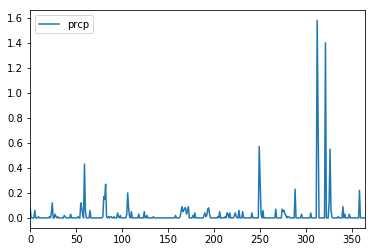

In [25]:
prcp.plot(y='prcp')
plt.show()

In [31]:
session.query(Station).count()

9

In [47]:
DF_measurement = pd.DataFrame(session.query(Measurement.station).all())

In [51]:
DF_measurement['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [65]:
tobs = pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').limit(365).all())

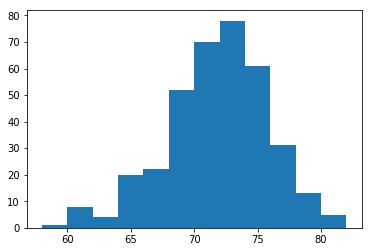

In [71]:
plt.hist(tobs['tobs'], bins=12)
plt.show()